In [ ]:
# Loading the dataset
# Using pandas
import pandas as pd
# Reading dataset
dataset = pd.read_table('ratings.dat', header = None, sep = '::', engine = 'python', usecols = [0,1,2], names = ('UserID','MovieID', 'Ratings'))

dataset.head()

# Are there missing values?
dataset.isna().sum()


# Keep in mind that there are “gaps” in numbering of users and items. (Dictionaries? Renumber everything? …)
# What is meant with this??

UserID     0
MovieID    0
Ratings    0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import mean_squared_error



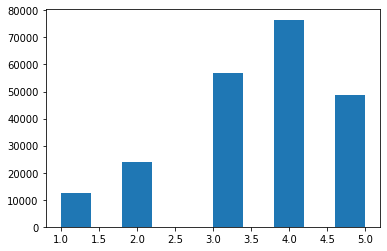

In [ ]:
import matplotlib.pyplot as plt
plt.hist(dataset['Ratings'])
plt.show()

In [ ]:
# How many unique Users and Movies there are

num_userID  = len(dataset.UserID.unique())
num_movieID = len(dataset.MovieID.unique())
#(num_userID,num_movieID)

(1325, 3481)

In [ ]:
# Taks 1.1 Naive Approaches

# Takes a long time to run but I think it works sort of correct, have also have to add everything for test 

n_splits = 5
KF = KFold(n_splits=n_splits, random_state=123, shuffle=True)
GlobalAvergage_RMSE, UserAverage_RMSE, MovieAverage_RMSE, LinReg_RMSE, LinRegInter_RMSE = list(),list(),list(),list(),list()
GlobalAvergage_MAE, UserAverage_MAE, MovieAverage_MAE, LinReg_MAE, LinRegInter_MAE = list(),list(),list(),list(),list()
for train, test in KF.split(dataset):
    #Define X and y in train and test
    X_train, X_test = dataset.iloc[train, 0:2], dataset.iloc[test, 0:2]
    y_train, y_test = dataset.iloc[train, -1], dataset.iloc[test, -1]
    
    # Models
    GlobalAvergage = y_train.mean()
    UserAverage = dataset.iloc[train]
    MovieAverage = dataset.iloc[train]
    
    # Create dataframe for Linear Regression
    UserAverage = UserAverage['Ratings'].groupby(UserAverage['UserID'], group_keys=False).transform('mean') 
    MovieAverage = MovieAverage['Ratings'].groupby(MovieAverage['MovieID'], group_keys=False).transform('mean')
    X_lr = pd.DataFrame(columns = ['UserAverage', 'MovieAverage'])
    X_lr['UserAverage'] = UserAverage
    X_lr['MovieAverage'] = MovieAverage   
    modelLinReg = LR(random_state=123, fit_intercept=False, max_iter= 10000).fit(X_lr,y_train)
    modelLinRegInter = LR(random_state=123, fit_intercept=True, max_iter= 10000).fit(X_lr,y_train)
    
    
    # Predictions 
    pred_GlobalAvergage = [GlobalAvergage] * len(X_train) 
    pred_UserAverage = UserAverage
    pred_MovieAverage = MovieAverage
    pred_LinReg = modelLinReg.predict(X_lr)
    pred_LinRegInter = modelLinRegInter.predict(X_lr)

    #RMSE's 
    RMSE_GlobalAvergage = math.sqrt(mean_squared_error(pred_GlobalAvergage,y_train))
    RMSE_UserAverage = math.sqrt(mean_squared_error(pred_UserAverage,y_train))
    RMSE_MovieAverage = math.sqrt(mean_squared_error(pred_MovieAverage,y_train))
    RMSE_LinReg = math.sqrt(mean_squared_error(pred_LinReg,y_train))
    RMSE_LinRegInter = math.sqrt(mean_squared_error(pred_LinRegInter,y_train))
    
    GlobalAvergage_RMSE.append(RMSE_GlobalAvergage)
    UserAverage_RMSE.append(RMSE_UserAverage)
    MovieAverage_RMSE.append(RMSE_MovieAverage)
    LinReg_RMSE.append(RMSE_LinReg)
    LinRegInter_RMSE.append(RMSE_LinRegInter)
    
    # MAE's 
    MAE_GlobalAvergage = mae(pred_GlobalAvergage, y_train)
    MAE_UserAverage = mae(pred_UserAverage, y_train)
    MAE_MovieAverage = mae(pred_MovieAverage, y_train)
    MAE_LinReg = mae(pred_LinReg, y_train)
    MAE_LinRegInter = mae(pred_LinRegInter, y_train)
    
    GlobalAvergage_MAE.append(MAE_GlobalAvergage)
    UserAverage_MAE.append(MAE_UserAverage)
    MovieAverage_MAE.append(MAE_MovieAverage)
    LinReg_MAE.append(MAE_LinReg)
    LinRegInter_MAE.append(MAE_LinRegInter)

In [ ]:
Average_RMSE_GlobalAvergage = np.mean(GlobalAvergage_RMSE)
Average_MAE_GlobalAvergage =  np.mean(GlobalAvergage_MAE)

Average_RMSE_UserAverage = np.mean(UserAverage_RMSE)
Average_MAE_UserAverage =  np.mean(UserAverage_MAE)

Average_RMSE_MovieAverage = np.mean(MovieAverage_RMSE)
Average_MAE_MovieAverage = np.mean(MovieAverage_MAE)

Average_RMSE_LinReg = np.mean(LinReg_RMSE)
Average_MAE_LinReg = np.mean(LinReg_MAE)

Average_RMSE_LinRegInter = np.mean(LinRegInter_RMSE)
Average_MAE_LinRegInter = np.mean(LinRegInter_MAE)

## Task 1.2


In [ ]:
dataset_task2 = dataset.pivot(
    index='UserID',
    columns='MovieID',
    values='Ratings'
)


In [ ]:
def Preprocessing(dataset):
    dataset1 = dataset.sub(dataset.mean(axis = 1), axis=0)
    dataset_end = dataset1.sub(dataset1.mean(axis = 0), axis = 1)
    return dataset_end

In [ ]:
def Initialization(dataset):
    d = 5
    n = dataset.shape[0]
    m = dataset.shape[1]
    a = dataset.stack().mean()
    U = np.empty([n,d])
    V = np.empty([d,m])
    U.fill(math.sqrt(a/d))
    V.fill(math.sqrt(a/d))
    return U,V
    